# Credit Card Dataset
The first dataset used was the one delivered from the following link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Task A
On Task A, the project stated that we had to follow the steps:
1. Mapping categorial data into numeric data
2. Rank features.
3. Perform dimension reduction (Principal Component Analysis or Kernel Principal Components).

In this dataset, there were no categorical data, which means that the first step was suppressed.

The data was loaded on the **Build table** section. Then, on the step **Rank features (Univariate Feature Selection)**, we chose a univariate feature selection to find the scores of the best features, chosen by SelectKBest function. 

Finally, we had to perform a dimension reduction on our data. For that, we used the well-known algorithm **PCA**.
After chossing X as all values of all columns and y as the column 23 (the output column), we split X and y into random train and test subsets, standardized the data and only then we applied the PCA to these same sets.
The plots were computed afterwards, showing the output values spread into the 2 principal components.

The output column (Y on the excel), shows information on the client's credibility of payment. If the value is "1", the client is credible, "0" if not.

In [70]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version


### Build table




In [71]:
df = pd.read_excel('default_credit_card_clients.xls')

# assign names to columns
df.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
              'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df = df.drop(['ID'])

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0



### Rank features (Univariate Feature Selection)




In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
import numpy

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    
y=df.as_matrix(columns=[df.columns[23]])

# features

X=df.as_matrix(columns=df.columns[1:])
print(X.shape)

#feature extraction (k=number of top features to select)
test = SelectKBest(f_classif, k=4)
fit = test.fit(X, y)

# print summarized scores
numpy.set_printoptions(precision=3)
print("Scores of each feature (Credit Card): ")
print(fit.scores_)

features = fit.transform(X)

# print the selected features
print("\nSelected features (Credit Card): ")
print(features)
#print(features[0:5,:])

(30000, 23)
Scores of each feature: 
[4.798e+01 2.355e+01 1.778e+01 5.789e+00 3.538e+03 2.239e+03 1.757e+03
 1.477e+03 1.305e+03 1.085e+03 1.158e+01 6.044e+00 5.944e+00 3.095e+00
 1.371e+00 8.658e-01 1.604e+02 1.033e+02 9.522e+01 9.719e+01 9.143e+01
 8.509e+01       inf]

Selected features: 
[[2 2 -1 1]
 [-1 2 0 1]
 [0 0 0 0]
 ...
 [4 3 2 1]
 [1 -1 0 1]
 [0 0 0 1]]



### Perform dimension reduction (PCA)




In [73]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
y_train=y_train.astype('int')
y_train= y_train.flatten()

#### Standardize the data

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Apply PCA

In [75]:
from sklearn.decomposition import PCA 

# Only two components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

pca.explained_variance_ratio_

array([0.282, 0.168])

#### Computing plots

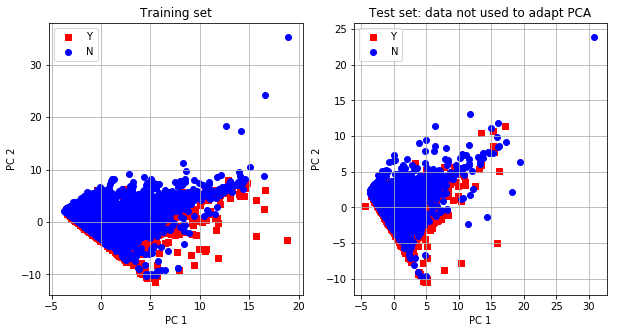

In [76]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()
ax = axes[0]
ax.figure
inx=(y_train==1)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='s',color='r',label='Y')

inx=(y_train==0)
inx=inx.ravel() 
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',color='b',label='N') 
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(y_test==1)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='s',color='r',label='Y') 
inx=(y_test==0)
inx=inx.ravel() 
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='o',color='b',label='N')

ax.set_title("Test set: data not used to adapt PCA")

ax.legend()
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Task B


On task B, we were tasked with:

1. choosing two of the learning algorithms taught during the lectures and train the model. 

2. tuning of the hyperparameters used on the learning algorithms.

For this dataset, after analysing the previous plots, we decided that we would use only non-linear algorithms because:
* Our problem was not linearly separable (as we can see from the above plots).
* Our classification threshold cannot be a line, plane or hyperplane like on linear methods.
* The dataset has high variance.

The algorithms chosen were two of the ones taught in classes: **SVM** (Support Vector Machine) [1] with rbf kernel and **MLP** (Multilayer Perceptron) [2].

Both algorithms perform binary classification, and MLP can perform either classification or regression, depending upon its activation function. We chose "tanh" as the activation function because, in practice, it is usually preferred over Sigmoid function.
Non-linear methods transform data to a new representational space (based on a kernel function) and then apply classification techniques to the data. 

We obtained a fairly good separation of the two existing classes, and the algorithm took a fairly higher time to compute than on the linear algorithms, giving us more accurate results.

The predictions shown on the plots are separated by color, being red the value "0", which means "the client is credible" on the original data and blue the value "1", which means "the client is not credible" on the original data.

The algorithms used for classification require the assigment of hyperparameters, whose values have influence on the performance of the model. 
In machine learning, hyperparameter optimization or also know as "tuning" [5] is the search of a set of optimal hyperparameters for a learning algorithm.
With this is mind, we created two functions, **mlp_tunning** and **svc_tunning**, which use the grid search provided by the method **GridSearchCV** to exhaustively generate candidates from a grid of parameter values specified with the param_grid parameter [3]. The method uses the estimator API of scikit-learn. When “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

#### Train the model with SVM and MLP algorithms

In [77]:
#numeric
import numpy as np
import pandas as pd
# graphics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import linalg as LA
from matplotlib.colors import ListedColormap

#this function was taken from the class guide "Linear models for Classification"
def plot_decision_regions(X, y, classifier, resolution=0.02): 
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

print(X_train_pca)
print(y_train)

[[-3.534  2.122]
 [ 0.483 -2.064]
 [-2.542  3.186]
 ...
 [ 0.785 -0.685]
 [-0.49  -0.773]
 [-0.536 -0.628]]
[0 0 0 ... 0 0 0]


MLP

In [42]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from random import uniform
from sklearn.neural_network import MLPClassifier

# function for tuning the hyper-parameters of the estimator
def mlp_tunning(X_train, y_train, clf):

    parameters = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh'],
    'alpha': [uniform(0.0001, 0.9)],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [1000,2000,3000,4000,5000] }

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

clf = MLPClassifier()    
best_parameters = mlp_tunning(X_train_pca,y_train, clf)

('Best accuracy: ', 0.8215238095238095)
('Best parameters: ', {'alpha': 0.6734629975330131, 'activation': 'tanh', 'max_iter': 2000, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,)})


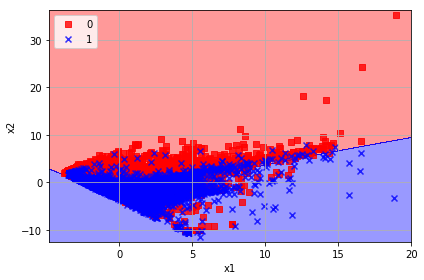

In [79]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,),alpha=0.6734629975330131, learning_rate= 'constant', max_iter=2000)

mlp.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=mlp) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

SVM

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# function for tuning the hyper-parameters of the estimator
def svc_tunning(X_train, y_train, clf):

    parameters = [{'C': np.logspace(-3, 2, 6), 'kernel': ['rbf'],
                   'gamma': np.logspace(-3, 2, 6)}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

clf = SVC()
best_parameters = svc_tunning(X_train_pca,y_train, clf)

('Best accuracy: ', 0.8673809523809524)
('Best parameters: ', {'kernel': 'rbf', 'C': 1.0, 'gamma': 10.0})


('Best accuracy: ', 0.8673809523809524)
('Best parameters: ', {'kernel': 'rbf', 'C': 1.0, 'gamma': 10.0})


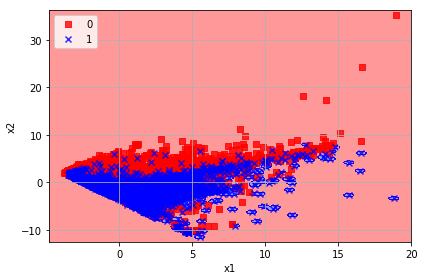

In [40]:
svm=SVC(C=1.0,kernel='rbf',gamma=10.0)

svm.fit(X_train_pca,y_train)

plot_decision_regions(X_train_pca, y_train, classifier=svm) 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show() 

# Adult Dataset
The second dataset used was the one delivered from the following link: https://archive.ics.uci.edu/ml/datasets/adult

## Task A


On Task A, the project stated that we had to follow the steps:
1. Mapping categorial data into numeric data
2. Rank features.
3. Perform dimension reduction (Principal Component Analysis or Kernel Principal Components).


The data was loaded on the **Build table** section. 

In this dataset, there was categorical data, which means that we had to map that same data into numeric data. That mapping was made with incremental integer numbers.

Then, on the step **Rank features (Univariate Feature Selection)**, we chose a univariate feature selection to find the scores of the best features, chosen by SelectKBest function. 

Finally, we had to perform a dimension reduction on our data. For that, we used the well-known algorithm **PCA**.
After chossing X as all values of all columns and y as the column 23 (the output column), we split X and y into random train and test subsets, standardized the data and only then we applied the PCA to these same sets.
The plots were computed afterwards, showing the output values spread into the 2 principal components.


The output column (last column on the .txt file), as information about wether the income of a person exceeds $50K/yr (">50K") or not ("<=50K").

In [1]:
#numeric
import numpy as np
import pandas as pd
import xlrd
from pandas import DataFrame, read_csv
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version


### Build table




In [2]:
data = pd.read_csv('adult.data.txt', delimiter=", ", header=None, engine='python')

# assign names to columns
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", \
                "marital-status" ,"occupation", "relationship", "race", "sex" ,\
                "capital-gain", "capital-loss", "hours-per-week", "native-country", \
                "probability-label"]

#show all features
#data.info()

### Mapping categorical data into numeric data


In [3]:
workclass_map = {'Private': 1,'Self-emp-not-inc': 2,'Self-emp-inc': 3,'Federal-gov': 4,'Local-gov': 5,
                               'State-gov': 6,'Without-pay': 7,'Never-worked': 8}

education_map = {'Bachelors': 1,'Some-college': 2,'11th': 3,'HS-grad': 4,'Prof-school': 5,
                                 'Assoc-acdm': 6,'Assoc-voc': 7,'9th': 8,'7th-8th': 9,'12th': 10,'Masters': 11,
                                 '1st-4th': 12,'10th': 13,'Doctorate': 14,'5th-6th': 15,'Preschool': 16}

marital_map = {'Married-civ-spouse': 1,'Divorced': 2,'Never-married': 3,'Separated': 4,
                                   'Widowed': 5,'Married-spouse-absent': 6,'Married-AF-spouse': 7}

occupation_map = {'Tech-support': 1,'Craft-repair': 2,'Other-service': 3,'Sales': 4,
                                'Exec-managerial': 5,'Prof-specialty': 6,'Handlers-cleaners': 7,
                                'Machine-op-inspct': 8,'Adm-clerical': 9,'Farming-fishing': 10,
                                'Transport-moving': 11,'Priv-house-serv': 12,'Protective-serv': 13,
                                'Armed-Forces': 14}

relationship_map = {'Wife': 1,'Own-child': 2,'Husband': 3,'Not-in-family': 4,
                                      'Other-relative': 5,'Unmarried': 6}

race_map = {'White': 1,'Asian-Pac-Islander': 2,'Amer-Indian-Eskimo': 3,'Other': 4,'Black': 5}

sex_map = {'Female': 1,'Male': 2}

country_map = {'United-States': 1,'Cambodia': 2,'England': 3,'Puerto-Rico': 4,
                                   'Canada': 5,'Germany': 6,'Outlying-US(Guam-USVI-etc)': 7,'India': 8,
                                   'Japan': 9,'Greece': 10,'South': 11,'China': 12,'Cuba': 13,'Iran': 14,
                                   'Honduras': 15,'Philippines': 16,'Italy': 17,'Poland': 18,'Jamaica': 19,
                                   'Vietnam': 20,'Mexico': 21,'Portugal': 22,'Ireland': 23,'France': 24,
                                   'Dominican-Republic': 25,'Laos': 26,'Ecuador': 27,'Taiwan': 28,'Haiti': 29,
                                   'Columbia': 30,'Hungary': 31,'Guatemala': 32,'Nicaragua': 33,'Scotland': 34,
                                   'Thailand': 35,'Yugoslavia': 36,'El-Salvador': 37,'Trinadad&Tobago': 38,
                                   'Peru': 39,'Hong': 40,'Holand-Netherlands': 41}

probability_map = {'<=50K': 1, '>50K' : 2}

data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(country_map)
data['probability-label'] = data['probability-label'].map(probability_map)

In [4]:
#Drop rows with Nan
#data.dropna(thresh=16)
#data = data[data.age != '?']

data = data.dropna(how="any")

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,probability-label
0,39,6.0,77516,1,13,3,9.0,4,1,2,2174,0,40,1.0,1
1,50,2.0,83311,1,13,1,5.0,3,1,2,0,0,13,1.0,1
2,38,1.0,215646,4,9,2,7.0,4,1,2,0,0,40,1.0,1
3,53,1.0,234721,3,7,1,7.0,3,5,2,0,0,40,1.0,1
4,28,1.0,338409,1,13,1,6.0,1,5,1,0,0,40,13.0,1
5,37,1.0,284582,11,14,1,5.0,1,1,1,0,0,40,1.0,1
6,49,1.0,160187,8,5,6,3.0,4,5,1,0,0,16,19.0,1
7,52,2.0,209642,4,9,1,5.0,3,1,2,0,0,45,1.0,2
8,31,1.0,45781,11,14,3,6.0,4,1,1,14084,0,50,1.0,2
9,42,1.0,159449,1,13,1,5.0,3,1,2,5178,0,40,1.0,2


### Rank features (Univariate Feature Selection)

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import numpy

array = data.values

X2 = array[:,0:15]
Y2 = array[:,14]

#print(X2)
#print("\n")
#print(Y2)

#feature extraction (k=number of top features to select)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X2, Y2)

# print summarized scores
numpy.set_printoptions(precision=3)
print("Scores of each feature: ")
print(fit.scores_)

features = fit.transform(X2)

# print the selected features (age,fnlwgt,capital-gain,capital-loss(?))
print("\nSelected features: ")
print(features)

Scores of each feature: 
[7.928e+03 2.723e+02 1.423e+05 7.424e+00 2.178e+03 2.888e+03 9.492e+01
 4.313e+02 2.759e+02 1.852e+02 7.413e+07 1.256e+06 5.569e+03 1.349e+03
 4.515e+03]

Selected features: 
[[3.900e+01 7.752e+04 2.174e+03 0.000e+00]
 [5.000e+01 8.331e+04 0.000e+00 0.000e+00]
 [3.800e+01 2.156e+05 0.000e+00 0.000e+00]
 ...
 [5.800e+01 1.519e+05 0.000e+00 0.000e+00]
 [2.200e+01 2.015e+05 0.000e+00 0.000e+00]
 [5.200e+01 2.879e+05 1.502e+04 0.000e+00]]


### Perform dimension reduction (PCA)

In [6]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

#### Prepare data for classification task

In [7]:
print(X2.shape)

X_train2, X_test2, y_train2, y_test2 = \
    train_test_split(X2, Y2, test_size=0.3, random_state=0)

(30162, 15)


#### Standardize the data

In [8]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train2)
X_test_std = sc.transform(X_test2)

#### Applying PCA

In [9]:
pca = PCA(n_components=2)
pc_X = pca.fit_transform(X_train_std)
principalComponentsTest = pca.transform(X_test_std)

pca.explained_variance_ratio_

#print(principalComponents) #316695
#create new 
#data_new = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
#data_new = pd.concat([data_new, data[['probability-label']]], axis = 1)

array([0.154, 0.095])

#### Computing plots

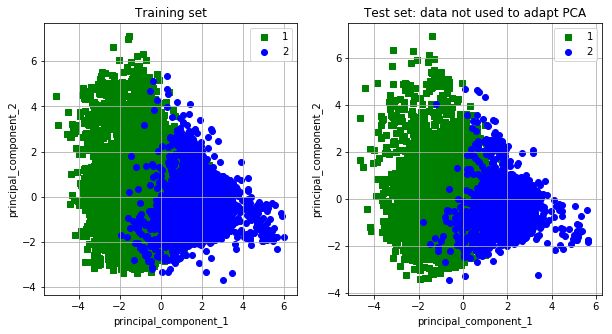

In [10]:
#label A = above 50K
#label B = below 50K
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes = axes.ravel()  

ax = axes[0]
ax.figure
inx=(y_train2==1)
inx=inx.ravel()
ax.scatter(pc_X[inx,0],pc_X[inx,1],marker='s',color='g',label='1')
inx=(y_train2==2)
inx=inx.ravel()
ax.scatter(pc_X[inx,0],pc_X[inx,1],marker='o',color='b',label='2')    
ax.set_title("Training set")
ax.set_xlabel('principal_component_1')
ax.set_ylabel('principal_component_2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(y_test2==1)
inx=inx.ravel()
ax.scatter(principalComponentsTest[inx,0],principalComponentsTest[inx,1],marker='s',color='g',label='1')  
inx=(y_test2==2)
inx=inx.ravel()
ax.scatter(principalComponentsTest[inx,0],principalComponentsTest[inx,1],marker='o',color='b',label='2')
ax.set_title("Test set: data not used to adapt PCA")    
ax.legend() 
ax.grid()
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.show()

## Task B


On task B, we were tasked with:

1. choosing two of the learning algorithms taught during the lectures and train the model. 

2. tuning of the hyperparameters used on the learning algorithms.

For this dataset, after analysing the previous plots, we decided that we would use only linear algorithms because:
* Linear methods can solve problems that are linearly separable (usually via a hyperplane).
* Our classification threshold is approximately linear (a line).
* The dataset has low variance.

The algorithms chosen were two of the ones taught in classes: Perceptron [4] and SVM [1].

**SVM** and **Perceptron** are binary classifiers, making them the right choice for predicting the also binary output of this dataset.
SVM is also a discriminative model, which means it tries to model by just depending on the observed data, while learning how to do the classification from the given statistics. 

We obtained a fairly good separation of the two existing classes, and the algorithm took little time to compute, so we concluded that the linear algorithms were the best choice.

The predictions shown on the plots are separated by color, being green the value **1.0**, which means **<=50K** on the original data and blue the value **2.0**, which means **>50K** on the original data.

Taking into account the definition of hyper-parameters and tuning on the section Task B of the first data set, we created two functions, **svc_tunning** and **perceptron_tunning**, which use the grid search provided by the method **GridSearchCV** to exhaustively generate candidates from a grid of parameter values specified with the param_grid parameter [3]. 

In [59]:
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from numpy import linalg as LA

from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC

#### Train the model with SVM and Perceptron algorithms

In [60]:
#this function was taken from the class guide "Linear models for Classification"
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

SVM

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# function for tuning the hyper-parameters of the estimator
def svc_tunning(X_train, y_train,clf):

    parameters = [{'C': np.logspace(-3, 2, 6), 'kernel': ['linear'],
                   'gamma': np.logspace(-3, 2, 6)}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

clf = SVC()
best_parameters = svc_tunning(pc_X,y_train2,clf)

('Best accuracy: ', 0.9385686543835552)
('Best parameters: ', {'kernel': 'linear', 'C': 0.01, 'gamma': 0.001})


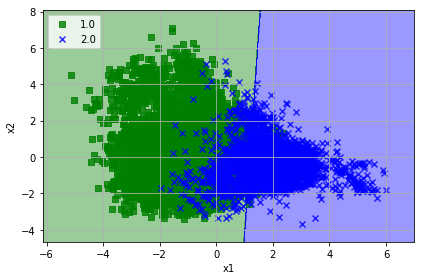

In [66]:
svm1=SVC(C= 0.01, gamma=0.001, kernel= 'linear')
svm1

svm1=svm1.fit(pc_X,y_train2)

plot_decision_regions(pc_X, y_train, classifier=svm1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

Perceptron

In [63]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from random import uniform

# function for tuning the hyper-parameters of the estimator
def perceptron_tunning(X_train, y_train, clf):

    parameters = [{'warm_start' : [False, True], 'penalty': ['l2'],
                 'alpha': [uniform(0.0001, 0.9)]}]

    grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1,scoring='accuracy', cv=5,)

    grid_search.fit(X_train, y_train)

    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_

    print("Best accuracy: ", best_accuracy)
    print("Best parameters: ", best_parameters)

    return best_parameters

clf = Perceptron()    
best_parameters = perceptron_tunning(pc_X,y_train, clf)

('Best accuracy: ', 0.5341258939989579)
('Best parameters: ', {'penalty': 'l2', 'alpha': 0.4056096238313554, 'warm_start': False})


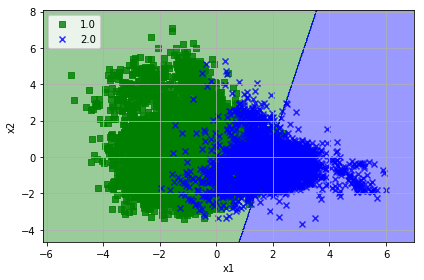

In [65]:
ppn=Perceptron(penalty='l2', alpha=0.4056096238313554, fit_intercept=True, eta0=0.1, n_jobs=1, warm_start=False)

ppn.fit(pc_X,y_train)

plot_decision_regions(pc_X, y_train, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

## References

[1] https://scikit-learn.org/stable/modules/svm.html

[2] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[3] https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search

[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

[5] https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search